#Extracting Data through APIs

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vishal1398
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 183MB/s]


In [4]:
data_filename="/content/us-accidents/US_Accidents_Dec21_updated.csv"

# Data Preparation and Cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [5]:
import pandas as pd
df=pd.read_csv(data_filename)

In [6]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [10]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

# **Percentage of missing values per Column**

In [11]:
missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

<Axes: >

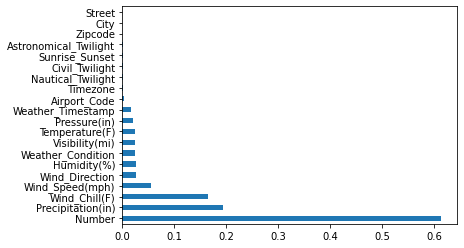

In [12]:
#Taking only non-zero % values
missing_percentage[missing_percentage!=0].plot(kind='barh')

# **Exploratory Analysis and Visualization**

Columns we'll analyze:

1. City
2. Start Time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition

# **City**

In [13]:
cities=df.City.unique()
len(cities)

11682

In [14]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [15]:
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

<Axes: >

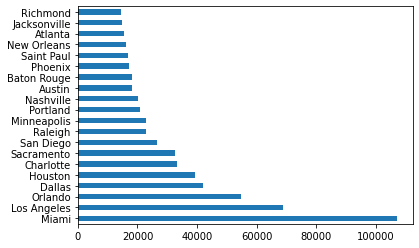

In [16]:
cities_by_accident[:20].plot(kind='barh')

In [17]:
import seaborn as sns
sns.set_style("darkgrid")

<Axes: xlabel='City', ylabel='Count'>

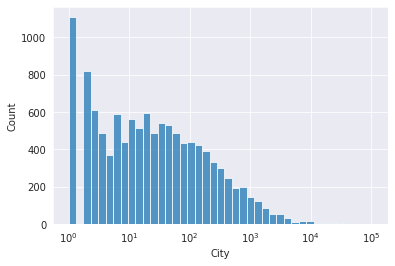

In [18]:
sns.histplot(cities_by_accident, log_scale=True)

In [19]:
high_accident_cities=cities_by_accident[cities_by_accident>=1000]
low_accident_cities=cities_by_accident[cities_by_accident<1000]

In [20]:
len(high_accident_cities)/len(cities)

0.04245848313644924

<Axes: xlabel='City', ylabel='Count'>

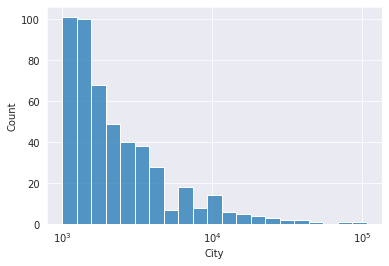

In [21]:
sns.histplot(high_accident_cities,log_scale=True)

<Axes: xlabel='City', ylabel='Count'>

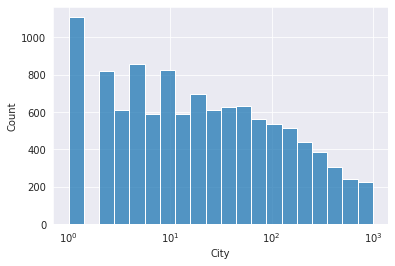

In [22]:
sns.histplot(low_accident_cities,log_scale=True,bins=20)

In [23]:
## Just check the trend
cities_by_accident[cities_by_accident == 10]

Elba               10
North Arlington    10
Delco              10
Bloomsbury         10
Doniphan           10
                   ..
Mainesburg         10
Lacona             10
Floweree           10
Moses Lake         10
Massey             10
Name: City, Length: 200, dtype: int64

**Start Time**

In [24]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [25]:
df.Start_Time = pd.to_datetime(df.Start_Time)

# **- Figure out how to show percentages**

<Axes: xlabel='Start_Time', ylabel='Count'>

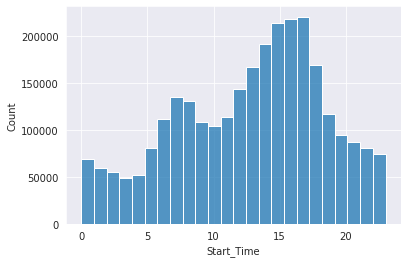

In [26]:
sns.histplot(df.Start_Time.dt.hour,bins=24)

<Axes: xlabel='Start_Time', ylabel='Density'>

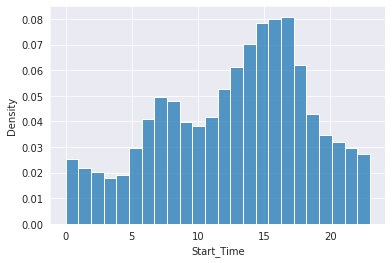

In [27]:
sns.histplot(df.Start_Time.dt.hour, bins=24,kde=False, stat="density")

**- A high percentage of accidents occur between 2 pm to 6 pm (probably people in a hurry to get to work)**

<Axes: xlabel='Start_Time', ylabel='Density'>

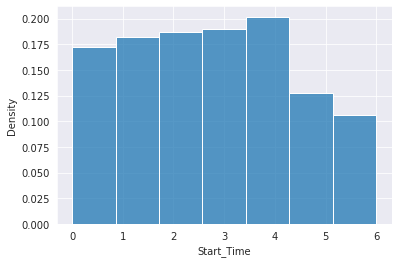

In [28]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7,kde=False, stat="density")

**Is the distribution of accidents by hour the same on weekends as on weekdays ?**

In [29]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sundays_start_time.head()

154   2016-02-14 03:58:33
155   2016-02-14 05:26:58
156   2016-02-14 16:30:40
157   2016-02-14 16:38:40
158   2016-02-14 17:40:17
Name: Start_Time, dtype: datetime64[ns]

<Axes: xlabel='Start_Time', ylabel='Density'>

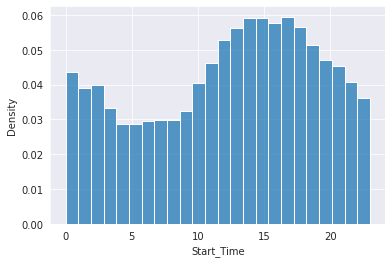

In [30]:
sns.histplot(sundays_start_time.dt.hour, bins=24,kde=False, stat="density")

**On Sundays,Most Accidents are between 12 pm to 6 pm**

In [31]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
mondays_start_time.head()

0   2016-02-08 00:37:08
1   2016-02-08 05:56:20
2   2016-02-08 06:15:39
3   2016-02-08 06:51:45
4   2016-02-08 07:53:43
Name: Start_Time, dtype: datetime64[ns]

<Axes: xlabel='Start_Time', ylabel='Density'>

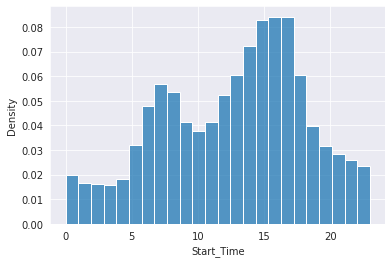

In [32]:
sns.histplot(mondays_start_time.dt.hour, bins=24,kde=False, stat="density")

**On Monday,most accidents are between 2 pm to 6 pm**

<Axes: xlabel='Start_Time', ylabel='Density'>

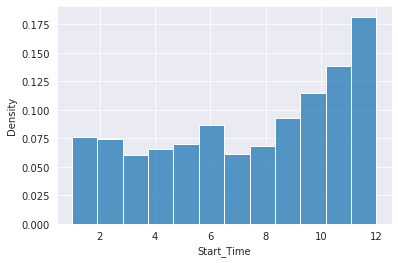

In [33]:
sns.histplot(df.Start_Time.dt.month, bins=12,kde=False, stat="density")

<Axes: xlabel='Start_Time', ylabel='Density'>

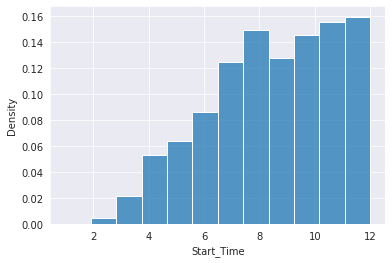

In [34]:
df_2019 = df.Start_Time[df.Start_Time.dt.year == 2016]
sns.histplot(df_2019.dt.month, bins=12,kde=False, stat="density")

Can you explain the month-wise trend of accidents?

- Much data is missing for 2016,maybe even 2017.

### Start Latitude & Longitude

In [35]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [36]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

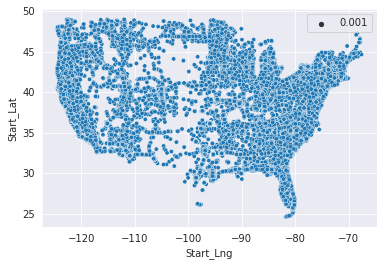

In [37]:
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [38]:
import folium

In [39]:
lat,lon=df.Start_Lat[0],df.Start_Lng[0]
lat,lon

(40.10891, -83.09286)

In [40]:
map=folium.Map()
marker=folium.Marker((lat,lon))
marker.add_to(map)
map

In [41]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

628209     37.690697
2222075    40.890940
1060136    34.692297
1380300    39.855812
1923214    25.880112
             ...    
180453     42.404850
1409147    33.461104
1477179    33.668851
1349659    33.963336
988820     25.764566
Name: Start_Lat, Length: 100, dtype: float64
628209    -122.125352
2222075   -111.896620
1060136    -82.870715
1380300   -104.914809
1923214    -80.210416
              ...    
180453     -83.157419
1409147   -112.382122
1477179   -112.117372
1349659    -84.105361
988820     -80.259218
Name: Start_Lng, Length: 100, dtype: float64


In [42]:
from folium.plugins import HeatMap

In [43]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [45]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Ask & answer questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York show up in the data? If yes, why is the count lower if this the most populated city.
4. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
5. What time of the day are accidents most frequent in? - ANSWERED
6. Which days of the week have the most accidents?
7. Which months have the most accidents?
8. What is the trend of accidents year over year (decreasing/increasing?)
9. When is accidents per unit of traffic the highest.

## Summary and Conclusion


Insights:
- No data from New York
- The number of accidents per city decreases exponentially
- Less than 5% of cities have more than 1000 yearly accidents.
- Over 1200 cities have reported just one accident (need to investigate)